In [ ]:
!pip install datasets
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none

In [ ]:
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util

data = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [ ]:
images = data["image"]
data=data.remove_columns("image")

product_frame=data.to_pandas()

In [ ]:
product_data=product_frame.reset_index(drop=True).to_dict(orient='index')

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

image_embeddings = model.encode([image for image in images])
text_embeddings = model.encode(product_frame['productDisplayName'])

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
q="blue jeans"
query_embedding = model.encode(q)
results = util.semantic_search(query_embedding, image_embeddings, top_k=5)[0]
print(results)

[{'corpus_id': 36711, 'score': 0.2869890034198761}, {'corpus_id': 26372, 'score': 0.28497713804244995}, {'corpus_id': 10125, 'score': 0.28484585881233215}, {'corpus_id': 11907, 'score': 0.28346070647239685}, {'corpus_id': 1, 'score': 0.2814236283302307}]


In [ ]:
def get_results(query,embeddings):
    query_embedding = model.encode(query)
    results = util.semantic_search(query_embedding,embeddings, top_k=10)[0]
    return results

In [ ]:
def print_images(results):
    for result in results:
        pid=result['corpus_id']
        print(product_data[pid]['productDisplayName'])
        display(images[pid])

Spykar Men Washed Blue Jeans


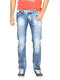

Spykar Women Blue Washed Jeans


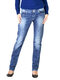

Flying Machine Men Blue Jeans


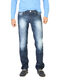

Spykar Men Blue Jeans


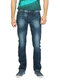

Peter England Men Party Blue Jeans


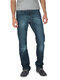

Deni Yo Men Slim Fit Washed Blue Jeans


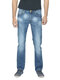

Spykar Men Washed Blue Jeans


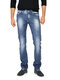

United Colors of Benetton Men Blue Washed Jeans


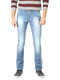

Deniyo Men Washed Blue Jeans


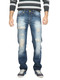

Deni Yo Men Washed Blue Jeans


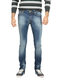

In [ ]:
results=get_results('blue jeans',image_embeddings)
print_images(results)

In [ ]:
!pip install -U langchain-openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00


In [ ]:
from langchain.schema import Document


def create_docs(results):
    docs=[]
    for result in results:
        pid=result['corpus_id']
        score=result['score']
        result_string = ''
        result_string += "Product Name:" + product_data[pid]['productDisplayName'] +  \
        ';' + "Category:" + product_data[pid]['masterCategory'] +  \
        ';' + "Article Type:" + product_data[pid]['articleType'] +  \
        ';' + "Usage:" + product_data[pid]['usage'] +  \
        ';' + "Season:" + product_data[pid]['season'] +  \
        ';' + "Gender:" + product_data[pid]['gender']
        doc=Document(page_content=result_string)
        doc.metadata['pid']=str(pid)
        doc.metadata['score']=score
        docs.append(doc)
    return docs

In [ ]:
!pip install python-dotenv

In [ ]:
import os
from dotenv import load_dotenv,find_dotenv
load_dotenv(find_dotenv())

from langchain.chat_models import ChatOpenAI
from langchain.chains.question_answering import load_qa_chain
from langchain.prompts import PromptTemplate

In [ ]:
template = """
You are a fashion shopping assistant that wants to convert customers based on the information given.


Describe season and usage given in the context in your interaction with the customer.

Use a bullet list when describing each product.

Context: {context}

User question:{question}


Your response:"""
prompt = PromptTemplate.from_template(template)

In [ ]:
api_key = 'sk-proj-A9gaXdrlseiWl0qPl9dFT3BlbkFJS2uaCupb2oYU1MUxqk5R'
chain = load_qa_chain(ChatOpenAI(model_name="gpt-3.5-turbo-0125", temperature=0.2, openai_api_key=api_key), chain_type="stuff", prompt=prompt)

In [ ]:
query="Looking for blue jeans"

results=get_results(query,image_embeddings)

docs=create_docs(results)

response=chain({"input_documents": docs, "question": query},return_only_outputs=True)

In [ ]:
print(response['output_text'])

Sure! Here are some blue jeans options for you based on the season and usage:

- Spykar Men Washed Blue Jeans
- Flying Machine Men Blue Jeans
- Deniyo Men Washed Blue Jeans
- Deni Yo Men Washed Blue Jeans
- Locomotive Men Loco Denims Blue Jeans
- United Colors of Benetton Women Washed Blue Jeans

These jeans are perfect for casual wear and are ideal for the Fall season. Let me know if you need any more information or assistance!


Spykar Men Washed Blue Jeans


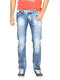

Flying Machine Men Blue Jeans


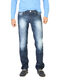

Deniyo Men Washed Blue Jeans


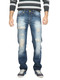

Spykar Men Aza Blue Jeans


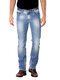

Deni Yo Men Slim Fit Washed Blue Jeans


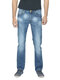

Deni Yo Men Washed Blue Jeans


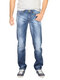

Spykar Women Blue Washed Jeans


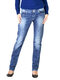

Locomotive Men Loco Denims Blue Jeans


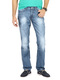

Spykar Men Washed Blue Jeans


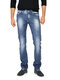

United Colors of Benetton Women Washed Blue Jeans


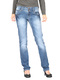

In [ ]:
print_images(results)